In [31]:
import csv
import time
from WiseSpeak.prompts import get_explanation
from evaluation import calculate_elder_x_score

In [32]:
PROMPTS = [
    "How do I reset my Wi-Fi router?",
    "What does 'low disk space' mean?",
    "Why isn't my phone charging?",
    "How do I install Zoom?",
    "What is two-factor authentication?",
    "How do I print from my phone?",
    "What does it mean when my screen goes black?",
    "How do I change my password?",
    "Why can't I hear sound from my laptop?",
    "How do I update my apps?",
    "What is a software update?",
    "Why does my phone keep restarting?",
    "How do I clear browser history?",
    "What is a strong password?",
    "Why is my screen frozen?",
    "How do I enable captions on YouTube?",
    "What is Bluetooth and how do I use it?",
    "How do I connect to a new Wi-Fi network?",
    "Why is my computer slow?",
    "What happens if I ignore a software update?",
    "How do I check when my next doctor appointment is?",
    "What is the easiest way to remember to take my pills?",
    "How do I order groceries online?",
    "What’s the best way to warm up leftovers safely?",
    "How can I get rid of fruit flies in my kitchen?",
    "How do I schedule a ride to the hospital?",
    "Can you help me keep track of my water intake?",
    "How do I clean my eyeglasses properly?",
    "What is the best way to fold fitted sheets?",
    "How do I check my mail without going outside?",
    "What does it mean if I feel dizzy when I stand up?",
    "How do I stretch my legs after sitting for too long?",
    "How do I set a reminder to call my family?",
    "What is the safest way to walk on icy sidewalks?",
    "How do I know if leftovers are still safe to eat?",
    "What is a quick meal I can cook without much effort?",
    "How do I make tea if I don’t have a kettle?",
    "What should I do if I feel anxious in the evening?",
    "How do I get better sleep at night?",
    "What does it mean if my ankles are swollen?",
    "How can I make a cup of coffee without a machine?",
    "What’s a gentle way to stretch in the morning?",
    "How do I write a thank-you note?",
    "What should I do if I miss a medication dose?",
    "How do I keep track of birthdays?",
    "What’s a safe way to clip toenails if I have trouble bending?",
    "How can I tell if I’m dehydrated?",
    "How do I light a candle if I have shaky hands?",
    "How can I open a tight jar lid easily?",
    "What should I do if I forget someone’s name during a conversation?"
]

In [33]:
STYLES = [
    ["short"],
    ["simplify"],
    ["step-by-step"],
    ["short", "simplify"],
    ["short", "step-by-step"],
    ["simplify", "step-by-step"],
    ["short", "simplify", "step-by-step"]
]

In [34]:
# 🔹 Meta
USER_NAME = "TestUser"
HOBBY = "gardening"  # adjust to test metaphor handling

# 🔹 Output File
OUTPUT_CSV = "evaluation_results.csv"

In [35]:
import os
import pandas as pd
# Load existing rows if file exists
existing_pairs = set()
if os.path.exists(OUTPUT_CSV):
    existing_df = pd.read_csv(OUTPUT_CSV)
    for _, row in existing_df.iterrows():
        prompt = row["Prompt"].strip().lower()
        style = row["Style"].strip().lower()
        existing_pairs.add((prompt, style))

In [36]:
# Open in append mode if file exists, else write headers
file_mode = "a" if os.path.exists(OUTPUT_CSV) else "w"
with open(OUTPUT_CSV, mode=file_mode, newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    if file_mode == "w":
        writer.writerow(["Prompt", "Style", "Score", "Readability", "Simplicity", "Actionability", "Comfort", "Explanation"])

    for prompt in PROMPTS:
        for style_list in STYLES:
            style_str = " + ".join(style_list).strip().lower()
            if (prompt.strip().lower(), style_str) in existing_pairs:
                print(f"⏩ Skipping: ({prompt}, {style_str})")
                continue

            print(f"📌 Generating: ({prompt}, {style_str})")
            try:
                explanation = get_explanation(USER_NAME, prompt, style_list, HOBBY)
                score, r, s, a, c = calculate_elder_x_score(explanation)
                s = max(0, s)
                c = max(0, c)

                writer.writerow([prompt, style_str, score, r, s, a, c, explanation])
                time.sleep(2.5)  # to avoid rate limit

            except Exception as e:
                print(f"⚠️ Error for ({prompt}, {style_str}): {e}")

⏩ Skipping: (How do I reset my Wi-Fi router?, short)
⏩ Skipping: (How do I reset my Wi-Fi router?, simplify)
⏩ Skipping: (How do I reset my Wi-Fi router?, step-by-step)
⏩ Skipping: (How do I reset my Wi-Fi router?, short + simplify)
⏩ Skipping: (How do I reset my Wi-Fi router?, short + step-by-step)
⏩ Skipping: (How do I reset my Wi-Fi router?, simplify + step-by-step)
⏩ Skipping: (How do I reset my Wi-Fi router?, short + simplify + step-by-step)
⏩ Skipping: (What does 'low disk space' mean?, short)
⏩ Skipping: (What does 'low disk space' mean?, simplify)
⏩ Skipping: (What does 'low disk space' mean?, step-by-step)
⏩ Skipping: (What does 'low disk space' mean?, short + simplify)
⏩ Skipping: (What does 'low disk space' mean?, short + step-by-step)
⏩ Skipping: (What does 'low disk space' mean?, simplify + step-by-step)
⏩ Skipping: (What does 'low disk space' mean?, short + simplify + step-by-step)
⏩ Skipping: (Why isn't my phone charging?, short)
⏩ Skipping: (Why isn't my phone charging?

,Style,Score,Readability,Simplicity,Actionability,Comfort
0,short,35.6,53.6,49.2,4.6,1.1
1,short + simplify,43.8,85.3,33.7,3.8,1.9
2,short + simplify + step-by-step,21.3,67.5,0.0,35.9,1.3
3,short + step-by-step,22.1,58.8,0.1,37.2,1.9
4,simplify,12.5,71.5,2.3,6.4,4.2
5,simplify + step-by-step,3.3,68.6,0.0,42.3,4.2
6,step-by-step,24.2,67.3,4.0,5.1,0.5


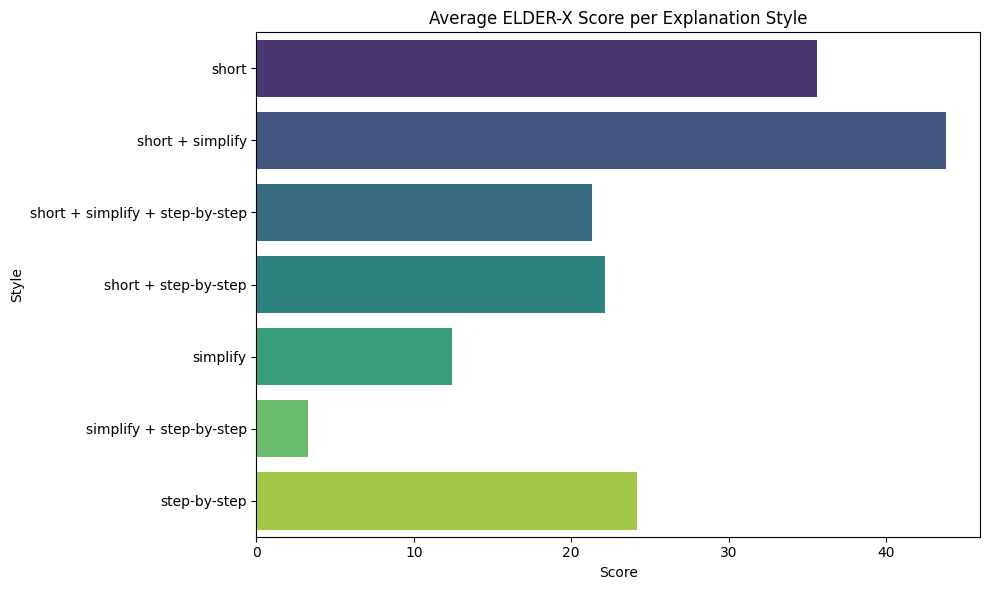

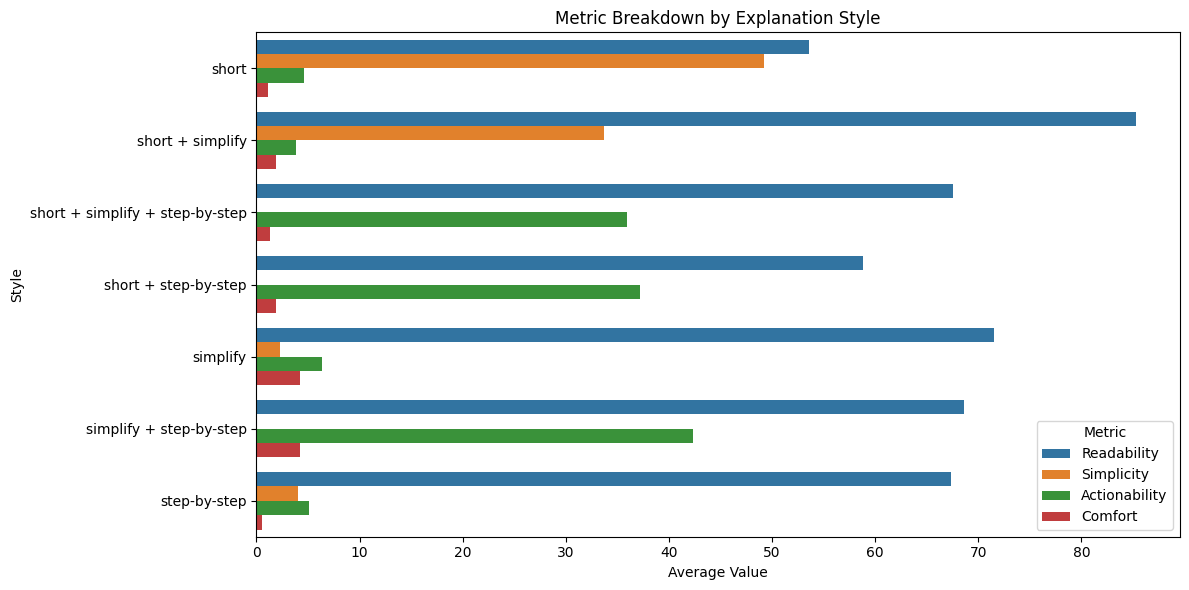

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load results
df = pd.read_csv("evaluation_results.csv")

# Fix any negative values
df["Simplicity"] = df["Simplicity"].apply(lambda x: max(0, x))
df["Comfort"] = df["Comfort"].apply(lambda x: max(0, x))

# Group by style
style_means = df.groupby("Style")[["Score", "Readability", "Simplicity", "Actionability", "Comfort"]].mean().reset_index()

# 📊 Show Table Summary
display(style_means.style.format({col: "{:.1f}" for col in style_means.columns if col != "Style"})
        .set_caption("📊 Average Metrics per Explanation Style"))

# Barplot: Overall Score per Style
plt.figure(figsize=(10, 6))
sns.barplot(data=style_means, x="Score", y="Style", hue="Style", dodge=False, palette="viridis", legend=False)
plt.title("Average ELDER-X Score per Explanation Style")
plt.xlabel("Score")
plt.ylabel("Style")
plt.tight_layout()
plt.show(block=True)

# Breakdown by Metric
melted = style_means.melt(id_vars="Style", value_vars=["Readability", "Simplicity", "Actionability", "Comfort"],
                          var_name="Metric", value_name="Value")

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x="Value", y="Style", hue="Metric", dodge=True)
plt.title("Metric Breakdown by Explanation Style")
plt.xlabel("Average Value")
plt.ylabel("Style")
plt.legend(title="Metric")
plt.tight_layout()
plt.show(block=True)


In [38]:
# Load your original evaluation results
df = pd.read_csv("evaluation_results.csv")

# Fix negative values
df["Simplicity"] = df["Simplicity"].apply(lambda x: max(0, x))
df["Comfort"] = df["Comfort"].apply(lambda x: max(0, x))

# Sort by overall ELDER-X score (descending)
top_50 = df.sort_values(by="Score", ascending=False).head(50)

# Prepare JSONL format for fine-tuning
finetune_data = []
for _, row in top_50.iterrows():
    finetune_data.append({
        "instruction": row["Prompt"],
        "input": row["Style"],
        "output": row["Explanation"].strip()
    })

# Save to JSONL
import json

output_path = "finetune_dataset_50.jsonl"
with open(output_path, "w", encoding="utf-8") as f:
    for item in finetune_data:
        json.dump(item, f)
        f.write("\n")

output_path

'finetune_dataset_50.jsonl'

In [40]:
# Load results
df = pd.read_csv("evaluation_results.csv")

# Clean up
df["Simplicity"] = df["Simplicity"].apply(lambda x: max(0, x))
df["Comfort"] = df["Comfort"].apply(lambda x: max(0, x))
df["Style"] = df["Style"].str.strip().str.lower()

# Filter only 'simplify + step-by-step' rows
target_style = "simplify + step-by-step"
filtered = df[df["Style"] == target_style]

# Sort and select top 30 by ELDER-X score
top_50 = filtered.sort_values(by="Score", ascending=False).head(50)

# Format for fine-tuning
finetune_data = []
for _, row in top_50.iterrows():
    finetune_data.append({
        "instruction": row["Prompt"],
        "input": row["Style"],
        "output": row["Explanation"].strip()
    })

# Save as JSONL
output_path = "finetune_step_actions.jsonl"
with open(output_path, "w", encoding="utf-8") as f:
    for item in finetune_data:
        json.dump(item, f)
        f.write("\n")

print("Saved to:", output_path)

Saved to: finetune_step_actions.jsonl
